# Pneumonia detection using Chest X-Ray Images

# What is Problem

 We have chest x-ray images from different age groups. Dataset is divided into Normal and Pneumonia images.Our goal is to predict pneumonia data with high accuracy. CNN (convolutional Neural Network) model was used for this problem.
 
# What models/knowledge you learned in the class is adopted.

1- In the Fully Connected Layers layer, the structure of the neural networks I learned in the classroom was used.

2- The activation functions (Sigmoid, RELU, Softmax) I learned in the classroom were used

3- Cross-Entropy Loss function  I learned in the classroom were used

4- Thanks to Gradient Descent and Stochastic Descent I learned in the class, I used Adam Optimizer for the optimizer function
 
 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
import seaborn as sns

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


Keras which is neural networks API was used to build the CNN model.

In [2]:
train_folder= 'chest_xray/train/'
val_folder = 'chest_xray/val/'
test_folder = 'chest_xray/test/'

In [3]:
os.listdir(train_folder)

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [4]:
train_normal = train_folder+'NORMAL/'
train_pneumonia = train_folder+'PNEUMONIA/'

In [5]:
number_train_normal = len(os.listdir(train_normal))
number_train_pneumonia =len(os.listdir(train_pneumonia))

print("The number of Normal Image : ", number_train_normal)
print("The number of Pneumonia Image: ", number_train_pneumonia)


The number of Normal Image :  1342
The number of Pneumonia Image:  3876


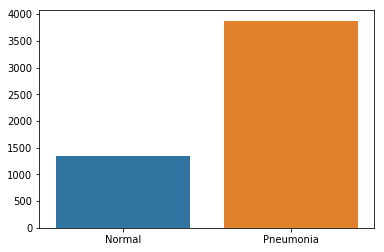

In [6]:
sns.barplot(x=['Normal','Pneumonia'],y=[number_train_normal,number_train_pneumonia])


In [7]:
# Pick Normal Picture
random_normal= np.random.randint(0,number_train_normal)

print(random_normal)

734


In [8]:
normal_pic = os.listdir(train_normal)[random_normal]
print('Normal Image_Name: ',normal_pic)

Normal Image_Name:  NORMAL2-IM-0559-0001.jpeg


In [9]:

norm_pic_address = train_normal+normal_pic


In [10]:
#Pneumonia
rand_pneumonia = np.random.randint(0,number_train_pneumonia)

print(rand_pneumonia)



1341


In [11]:
pneumonia_pic =  os.listdir(train_pneumonia)[rand_pneumonia]
pneumonia_address = train_pneumonia+pneumonia_pic
print('Pneumonia Image_Name:', pneumonia_pic)

Pneumonia Image_Name: person1626_bacteria_4291.jpeg


In [12]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(pneumonia_address)

Text(0.5, 1.0, 'Pneumonia')

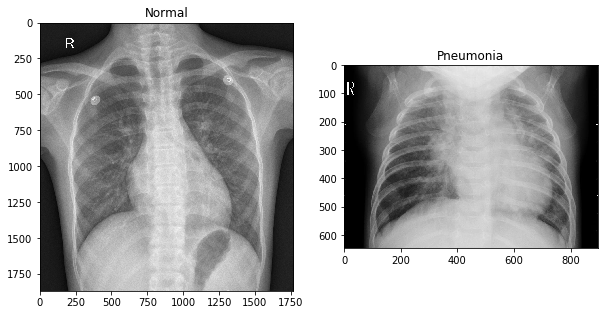

In [13]:
#Let's plt these images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')


# CNN (Convolutional Neural Network)

Convolutional neural network (ConvNets or CNNs) is used for image recognition and image classification. Actually, CNN has a neural network structure. They are made up of neurons that have learnable weights and biases. CNN's input data is image, and input image data’s size must be a x a x d where a is the height and width of the image, and d shows the depth (channel) of the image.

The following image is an example flowchart of the CNN.


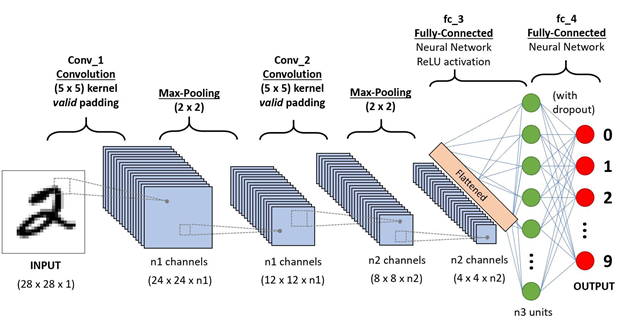


CNN consists of 3 basic operations which are Convolutional Layer, Pooling Layer, and Fully-Connected Layer. 


Let's build our model. We created a sequential model, afterward, we will add convolutional layers and max pooling layers to it.
The sequential API paves the way for creating models layer-by-layer for problems.

In [14]:
cnn = Sequential()

# 1) Convolution Layer

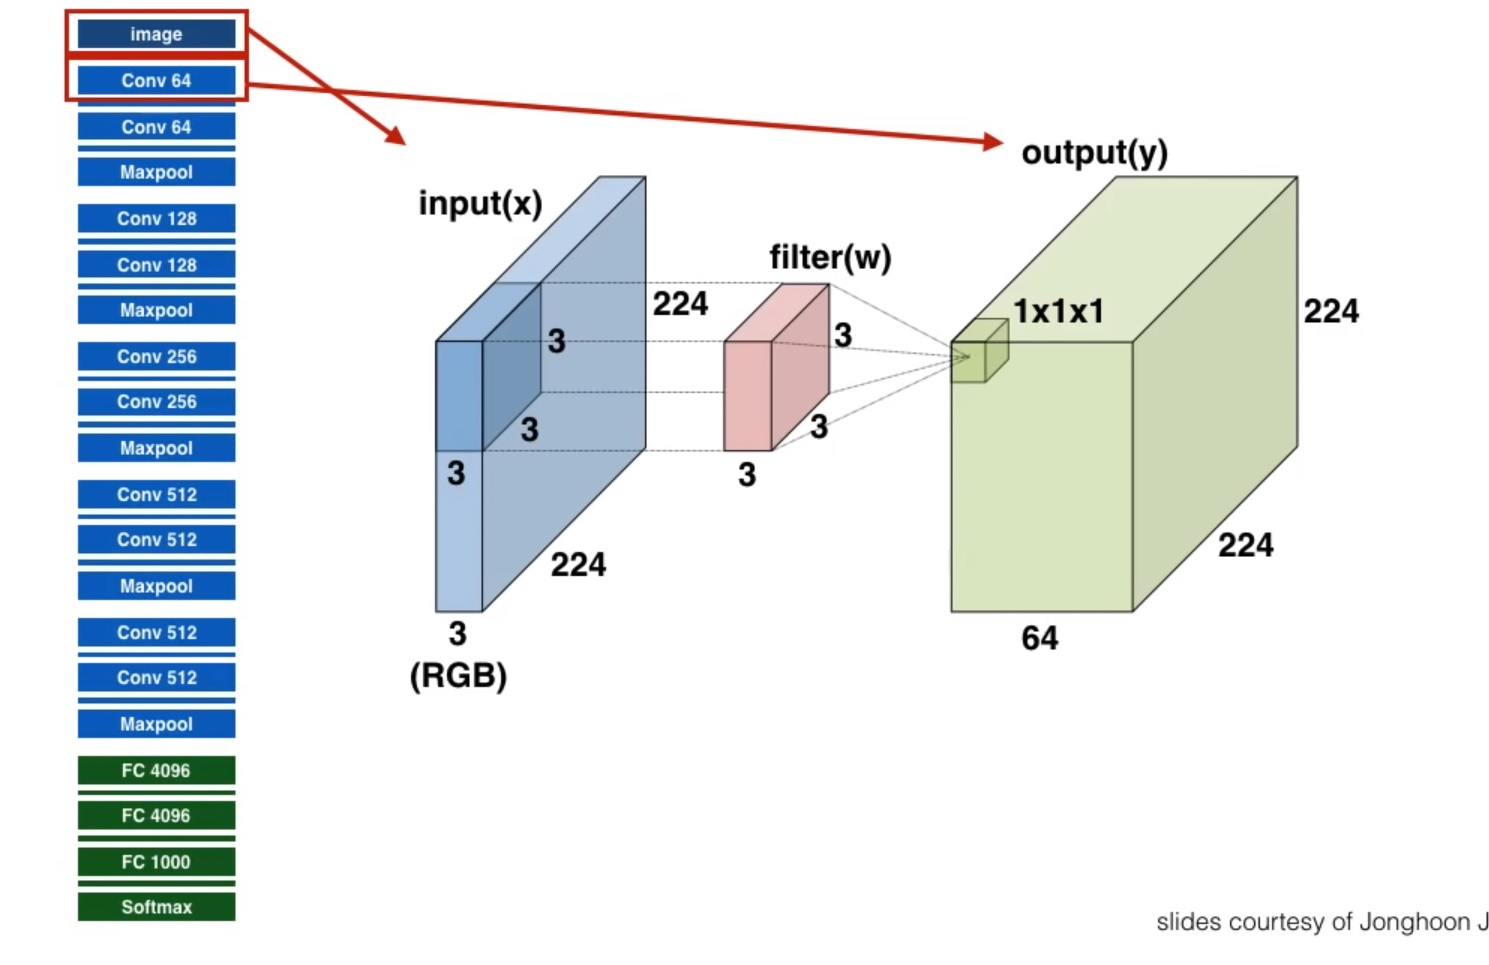

For color image, depth is 3 (RGB). Every image is a matrix of pixel values. We define our x ray pictures as 64 x 64 x 3. 
Our entries in the neural network were vector, but CNN is the image with depth.

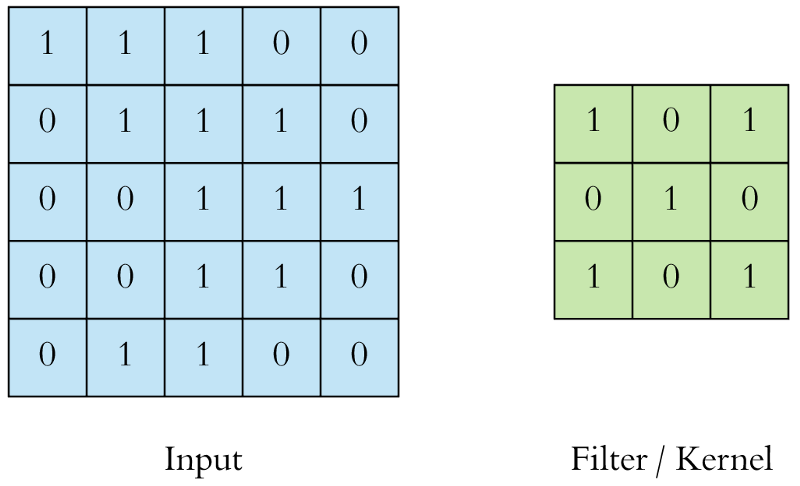

In convolution layer, we have input (blue) and filter (green) ( also called kernel) matrices as above.The filter (green) slides over the input image (blue) one pixel at a time starting from the top left. Matrices are multiplied and feature map is created, the following gift is an example of this process. 

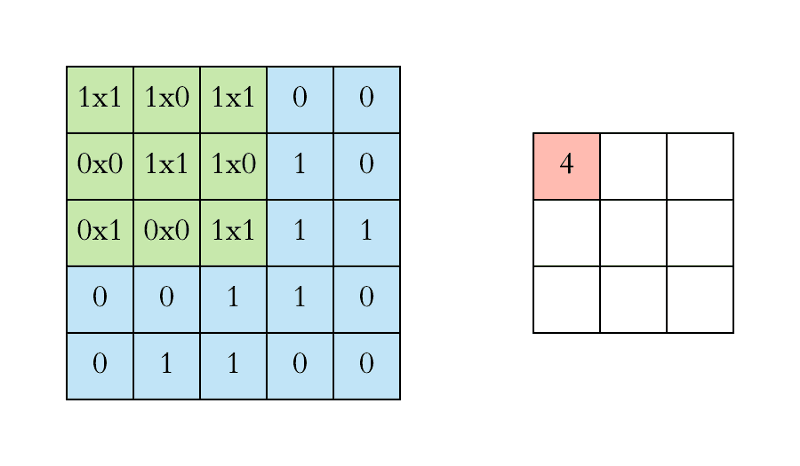

The calculation example of 4 (top left value) in Feature map is as follows.

(1×1+0×1+1×1)+(0×0+1×1+1×0)+(1×0+0×0+1×1)=4

In the example below, the convolutional layer is summarized.

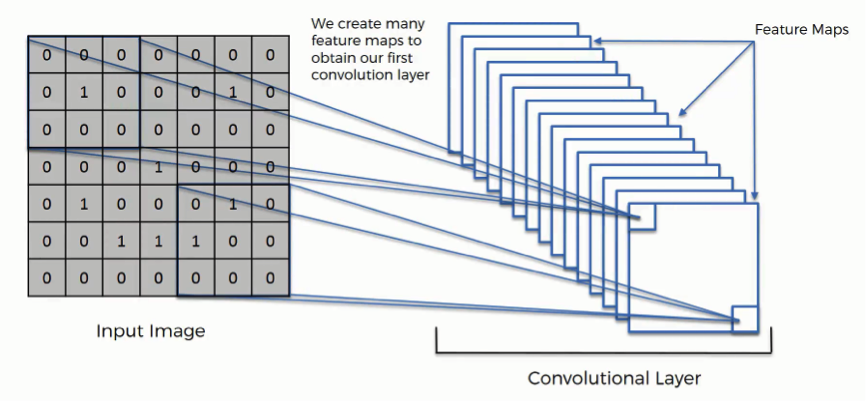

Convolutional layer volume depends on the input image volume, filter volume, and stride number. For example, if our input image is 64 x 64 x 3 , and our filter is 3x3, our feature map is gonna be 62 x 62 x depth

(64 - 3)/1 + 1 = 62




# What Convolution Matrices tells us

An example with another images

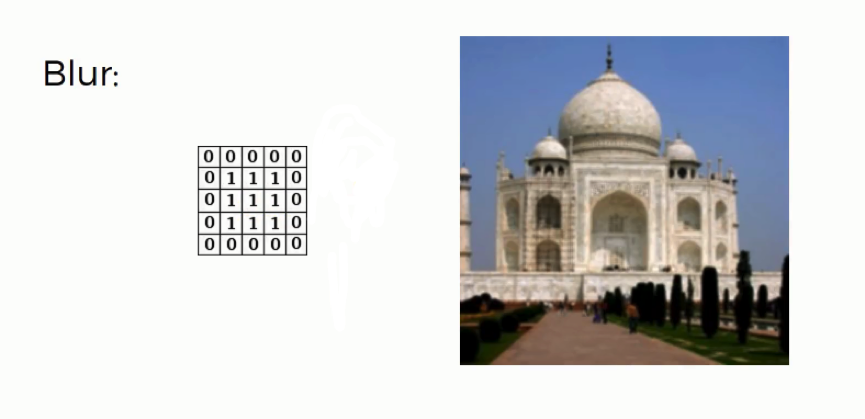
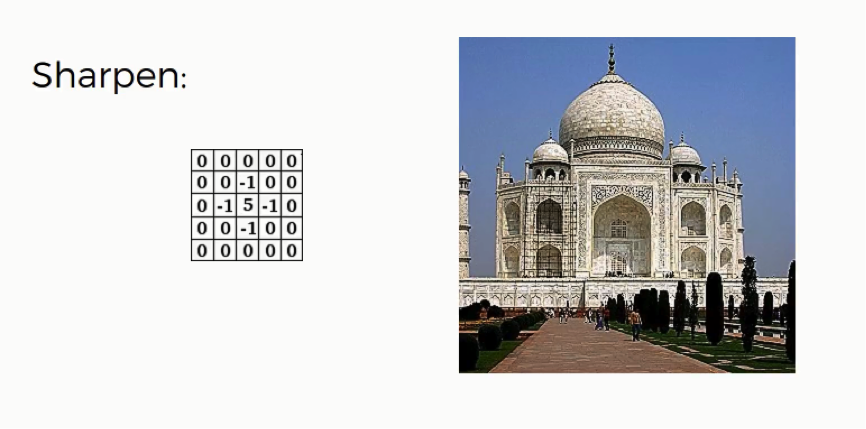

In [15]:
#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

Instructions for updating:
Colocations handled automatically by placer.


# 2)  Rectified Linear Unit (RELU)

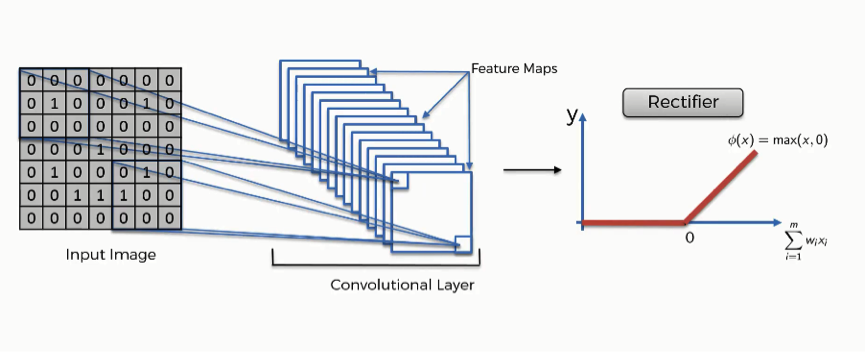


ReLU is linear for all positive values, and zero for all negative values. The main goal of applying the rectifier function is to ascend the non-linearity in images. The reason we wish to do that is that images are naturally non-linear.


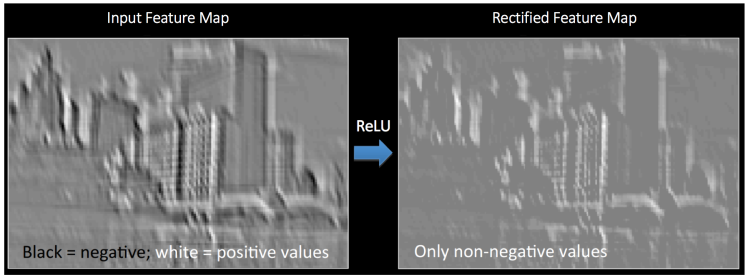

In [16]:
#Pooling
cnn.add(MaxPooling2D(pool_size = (3, 3),  padding='valid',strides=2 ))

# 3) Pooling

A pooling layer that decreases the image dimensionality without losing important features or patterns. Mainly, there are three types of pooling method in CNN. These are mean, max, and sum poolings. We are using max pooling in our example.

The main goal of max pooling is making possible the convolutional neural network to detect the image when presented with the image in any style.



Strides

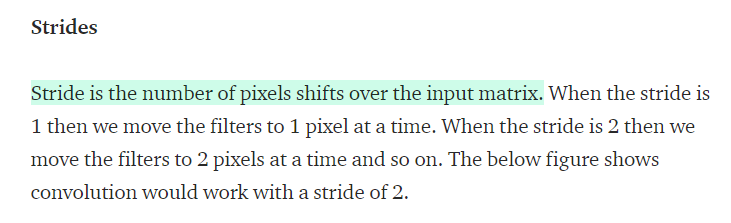



Padding

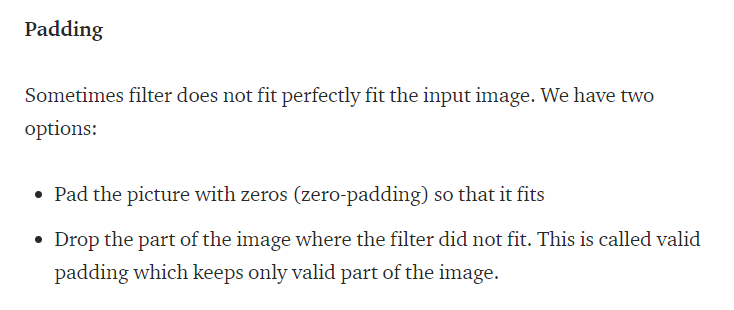

In [17]:
# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

In [18]:
# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (3, 3)))

# 4) Flatten

Before the fully connected layer, there is a ‘Flatten’ layer. Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.


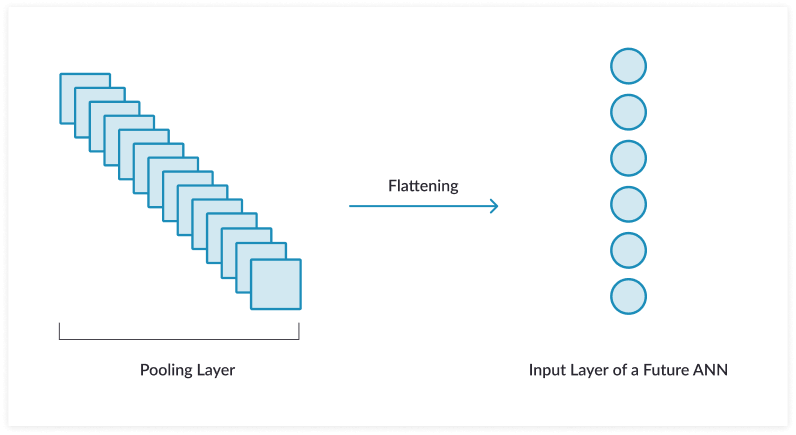

In [19]:
# Flatten the layer
cnn.add(Flatten())

# 5) Fully Connected Layers

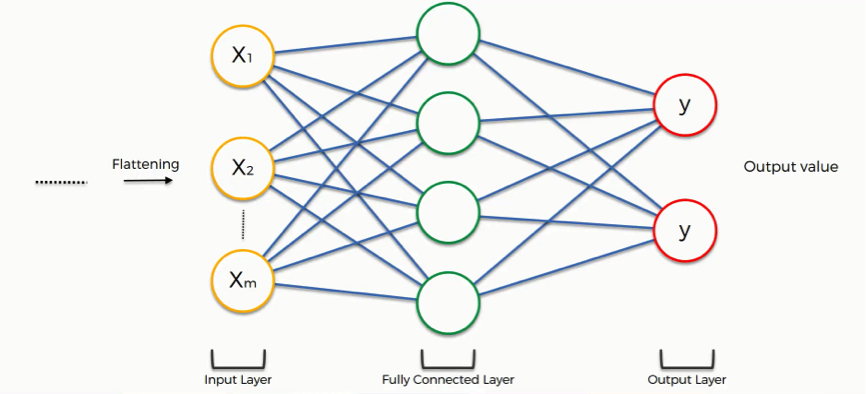

We are saying the layer in the middle a “hidden layer” in the neural networks, on the other hand in the convolutional context we are calling as a fully-connected layer. In our example, output is going to be 'Normal' and 'Pneumonia'

In [20]:
# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Loss Function

Cross-Entropy (Log Loss )

Log Loss is a loss function also used frequently in classification problems.

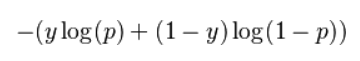


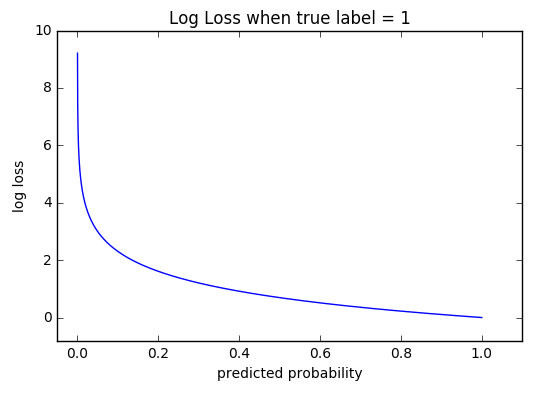




# Optimizer


# 1) Adam Optimizer

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

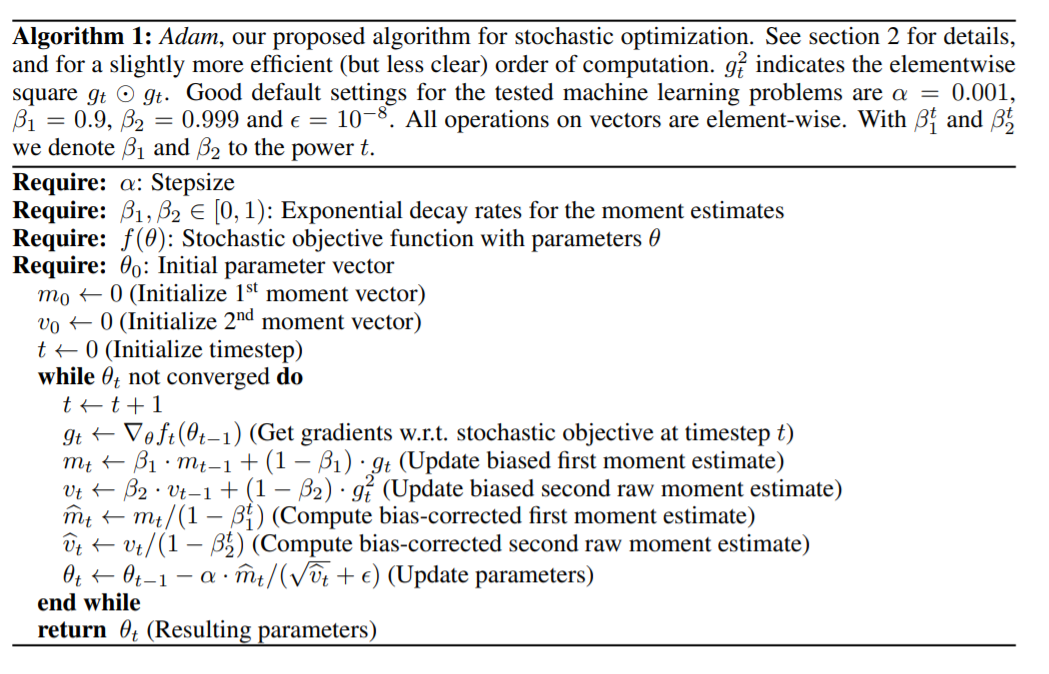

In [21]:
# Compile the Neural network
customAdam = keras.optimizers.Adam(lr=0.001)
cnn.compile(optimizer = customAdam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#https://keras.io/preprocessing/image/

In [23]:
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

#https://keras.io/preprocessing/image/

In [24]:

#The batch size defines the number of samples that will be propagated through the network.

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [25]:
validation_generator = test_datagen.flow_from_directory('chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [26]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               331904    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [27]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = 600)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
100/100 [==============================] - 172s 2s/step - loss: 0.4440 - acc: 0.8059 - val_loss: 0.3143 - val_acc: 0.8750
Epoch 2/5
100/100 [==============================] - 147s 1s/step - loss: 0.2476 - acc: 0.8894 - val_loss: 0.2890 - val_acc: 0.8750
Epoch 3/5
100/100 [==============================] - 155s 2s/step - loss: 0.2193 - acc: 0.9116 - val_loss: 0.3663 - val_acc: 0.7500
Epoch 4/5
100/100 [==============================] - 156s 2s/step - loss: 0.1861 - acc: 0.9284 - val_loss: 0.3790 - val_acc: 0.7500
Epoch 5/5
100/100 [==============================] - 156s 2s/step - loss: 0.2197 - acc: 0.9084 - val_loss: 0.3152 - val_acc: 0.8125


In [28]:
test_accu = cnn.evaluate_generator(test_set,steps=600)

In [29]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 89.1025641026 %


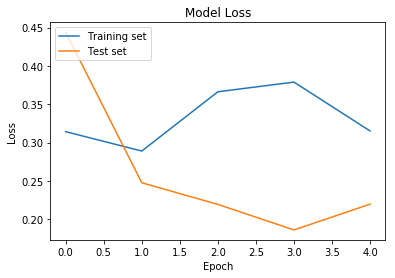

In [30]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()